<a href="https://colab.research.google.com/github/polaroidz/polaroidz/blob/main/Dealing_with_missing_data_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)
library(naniar)
library(simputation)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
# Summarize missingness in each variable of the `airquality` dataset
miss_var_summary(airquality)

In [ ]:
# Return the summary of missingness in each variable, 
# grouped by Month, in the `airquality` dataset
airquality %>% group_by(Month) %>% miss_var_summary()

# Return the summary of missingness in each case, 
# grouped by Month, in the `airquality` dataset
airquality %>% group_by(Month) %>% miss_case_summary()

In [ ]:
# Tabulate missingness in each variable and case of the `airquality` dataset
miss_var_table(airquality)
miss_case_table(airquality)

# Tabulate the missingness in each variable, grouped by Month, in the `airquality` dataset
airquality %>% group_by(Month) %>% miss_var_table()

# Tabulate of missingness in each case, grouped by Month, in the `airquality` dataset
airquality %>% group_by(Month) %>% miss_case_table()

In [ ]:
# Calculate the summaries for each run of missingness for the variable, hourly_counts
miss_var_run(pedestrian, var = hourly_counts)

# Calculate the summaries for each span of missingness, 
# for a span of 4000, for the variable hourly_counts
miss_var_span(pedestrian, var = hourly_counts, span_every = 4000)

# For each `month` variable, calculate the run of missingness for hourly_counts
pedestrian %>% group_by(month) %>% miss_var_run(var = hourly_counts)

# For each `month` variable, calculate the span of missingness 
# of a span of 2000, for the variable hourly_counts
pedestrian %>% group_by(month) %>% miss_var_span(var = hourly_counts, span_every = 2000)

In [ ]:
# Visualize all of the missingness in the `riskfactors`  dataset
vis_miss(riskfactors)

# Visualize and cluster all of the missingness in the `riskfactors` dataset
vis_miss(riskfactors, cluster = TRUE)

# Visualize and sort the columns by missingness in the `riskfactors` dataset
vis_miss(riskfactors, sort_miss = TRUE)

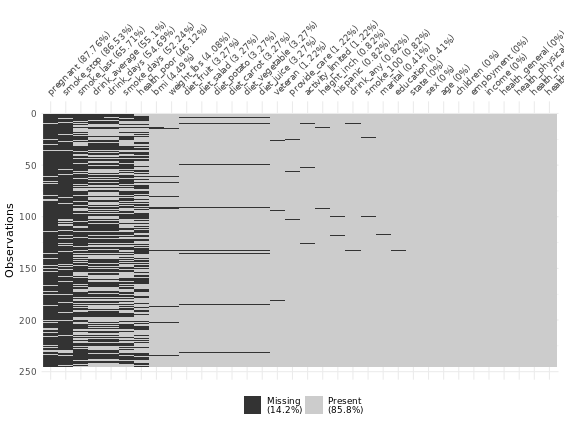

In [ ]:
# Visualize the number of missings in cases using `gg_miss_case()`
gg_miss_case(riskfactors)

# Explore the number of missings in cases using `gg_miss_case()` 
# and facet by the variable `education`
gg_miss_case(riskfactors, facet = education)

# Visualize the number of missings in variables using `gg_miss_var()`
gg_miss_var(riskfactors)

# Explore the number of missings in variables using `gg_miss_var()` 
# and facet by the variable `education`
gg_miss_var(riskfactors, facet = education)

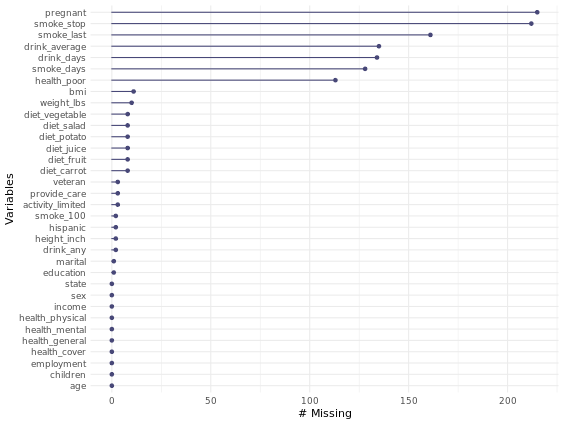

In [ ]:
# Using the airquality dataset, explore the missingness pattern using gg_miss_upset()
gg_miss_upset(airquality)

# With the riskfactors dataset, explore how the missingness changes across the marital variable using gg_miss_fct()
gg_miss_fct(x = riskfactors, fct = marital)

# Using the pedestrian dataset, explore how the missingness of hourly_counts changes over a span of 3000 
gg_miss_span(pedestrian, var = hourly_counts, span_every = 3000)

# Using the pedestrian dataset, explore the impact of month by faceting by month
# and explore how missingness changes for a span of 1000
gg_miss_span(pedestrian, var = hourly_counts, span_every = 1000, facet = month)

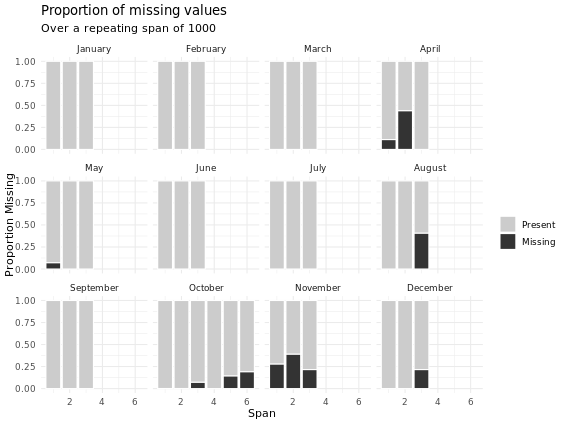

In [ ]:
# Explore the strange missing values "N/A"
miss_scan_count(data = pacman, search = list("N/A"))

# Explore the strange missing values "missing"
miss_scan_count(data = pacman, search = list("missing"))

# Explore the strange missing values "na"
miss_scan_count(data = pacman, search = list("na"))

# Explore the strange missing values " " (a single space)
miss_scan_count(data = pacman, search = list(" "))

# Explore all of the strange missing values, "N/A", "missing", "na", " "
miss_scan_count(data = pacman, search = list("N/A", "missing","na", " "))

In [ ]:
# Print the top of the pacman data using `head()`
head(pacman)

# Replace the strange missing values "N/A", "na", and 
# "missing" with `NA` for the variables, year, and score
pacman_clean <- replace_with_na(pacman, replace = list(year = c("N/A", "na", "missing"),
                                score = c("N/A", "na", "missing")))
                                        
# Test if `pacman_clean` still has these values in it?
miss_scan_count(pacman_clean, search = list("N/A", "na", "missing"))

In [ ]:
# Use `replace_with_na_at()` to replace with NA
replace_with_na_at(pacman,
                   .vars = c("year", "month", "day"), 
                   ~.x %in% c("N/A", "missing", "na", " "))

# Use `replace_with_na_if()` to replace with NA the character values using `is.character`
replace_with_na_if(pacman,
                   .predicate = is.character, 
                   ~.x %in% c("N/A", "missing", "na", " "))

# Use `replace_with_na_all()` to replace with NA
replace_with_na_all(pacman, ~.x %in% c("N/A", "missing", "na", " "))

In [ ]:
# Print the frogger data to have a look at it
frogger

# Correctly fill() and complete() missing values so that our dataset becomes sensible
frogger %>%
  fill(name) %>%
  complete(name, time)

In [ ]:
# Create shadow matrix data with `as_shadow()`
as_shadow(oceanbuoys)

# Create nabular data by binding the shadow to the data with `bind_shadow()`
bind_shadow(oceanbuoys)

# Bind only the variables with missing values by using bind_shadow(only_miss = TRUE)
bind_shadow(oceanbuoys, only_miss = TRUE)

In [ ]:
# `bind_shadow()` and `group_by()` humidity missingness (`humidity_NA`)
oceanbuoys %>%
  bind_shadow() %>%
  group_by(humidity_NA) %>%
  summarize(wind_ew_mean = mean(wind_ew), # calculate mean of wind_ew
            wind_ew_sd = sd(wind_ew)) # calculate standard deviation of wind_ew
  
# Repeat this, but calculating summaries for wind north south (`wind_ns`)
oceanbuoys %>%
  bind_shadow() %>%
  group_by(humidity_NA) %>%
  summarize(wind_ns_mean = mean(wind_ns),
            wind_ns_sd = sd(wind_ns))

In [ ]:
# Summarize wind_ew by the missingness of `air_temp_c_NA`
oceanbuoys %>% 
  bind_shadow() %>%
  group_by(air_temp_c_NA) %>%
  summarize(wind_ew_mean = mean(wind_ew),
            wind_ew_sd = sd(wind_ew),
            n_obs = n())

# Summarize wind_ew by missingness of `air_temp_c_NA` and `humidity_NA`
oceanbuoys %>% 
  bind_shadow() %>%
  group_by(air_temp_c_NA, humidity_NA) %>%
  summarize(wind_ew_mean = mean(wind_ew),
            wind_ew_sd = sd(wind_ew),
            n_obs = n())

In [ ]:
# First explore the missingness structure of `oceanbuoys` using `vis_miss()`
vis_miss(oceanbuoys)

# Explore the distribution of `wind_ew` for the missingness  
# of `air_temp_c_NA` using  `geom_density()`
bind_shadow(oceanbuoys) %>%
  ggplot(aes(x = wind_ew, 
             color = air_temp_c_NA)) + 
  geom_density()

# Explore the distribution of sea temperature for the  
# missingness of humidity (humidity_NA) using  `geom_density()`
bind_shadow(oceanbuoys) %>%
  ggplot(aes(x = sea_temp_c,
             color = humidity_NA)) + 
  geom_density()

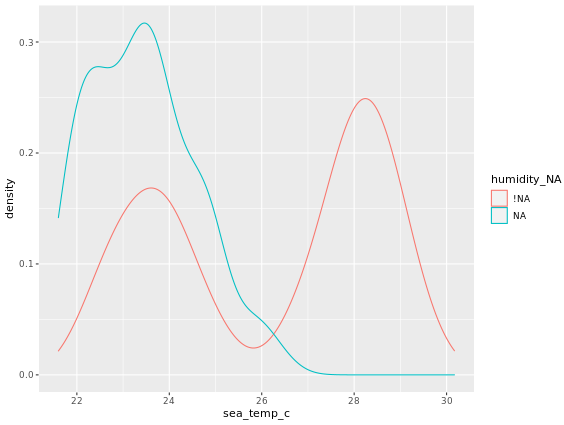

In [ ]:
# Explore the distribution of wind east west (wind_ew) for the missingness of air temperature 
# using geom_density() and faceting by the missingness of air temperature (air_temp_c_NA).
oceanbuoys %>%
  bind_shadow() %>%
  ggplot(aes(x = wind_ew)) + 
  geom_density() + 
  facet_wrap(~air_temp_c_NA)

# Build upon this visualization by filling by the missingness of humidity (humidity_NA).
oceanbuoys %>%
  bind_shadow() %>%
  ggplot(aes(x = wind_ew,
             color = humidity_NA)) + 
  geom_density() + 
  facet_wrap(~air_temp_c_NA)

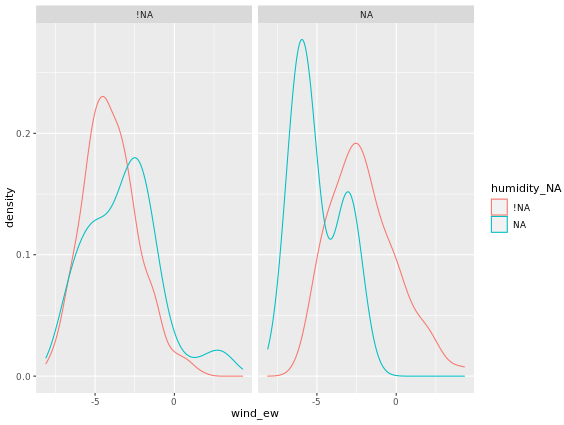

In [ ]:
# Explore the distribution of wind east west (`wind_ew`) for  
# the missingness of air temperature using  `geom_boxplot()`
oceanbuoys %>%
  bind_shadow() %>%
  ggplot(aes(x = air_temp_c_NA,
             y = wind_ew)) + 
  geom_boxplot()

# Build upon this visualization by faceting by the missingness of humidity (`humidity_NA`).
oceanbuoys %>%
  bind_shadow() %>%
  ggplot(aes(x = air_temp_c_NA,
             y = wind_ew)) + 
  geom_boxplot() + 
  facet_wrap(~humidity_NA)

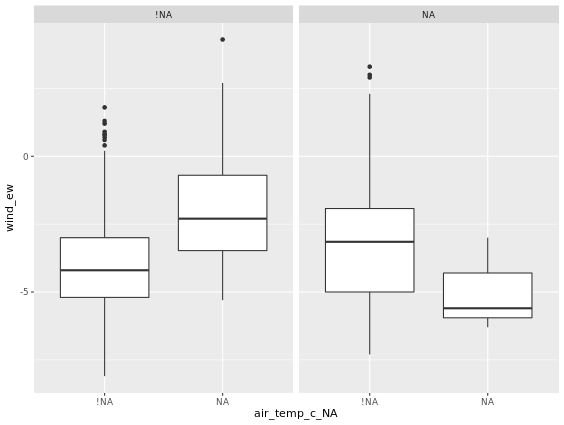

In [ ]:
# Explore the missingness in wind and air temperature, and  
# display the missingness using `geom_miss_point()`
ggplot(oceanbuoys,
       aes(x = wind_ew,
           y = air_temp_c)) + 
  geom_miss_point()

# Explore the missingness in humidity and air temperature,  
# and display the missingness using `geom_miss_point()`
ggplot(oceanbuoys,
       aes(x = humidity,
           y = air_temp_c)) + 
  geom_miss_point()

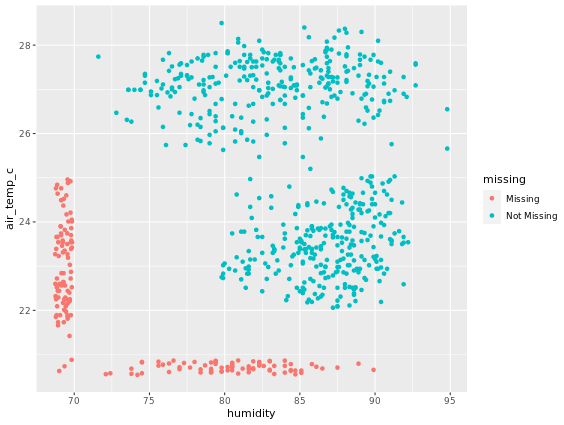

In [ ]:
# Explore the missingness in wind and air temperature, and display the 
# missingness using `geom_miss_point()`. Facet by year to explore this further.
ggplot(oceanbuoys,
       aes(x = wind_ew,
           y = air_temp_c)) + 
  geom_miss_point() + 
  facet_wrap(~year)

# Explore the missingness in humidity and air temperature, and display the 
# missingness using `geom_miss_point()` Facet by year to explore this further.
ggplot(oceanbuoys,
       aes(x = humidity,
           y = air_temp_c)) + 
  geom_miss_point() + 
  facet_wrap(~year)

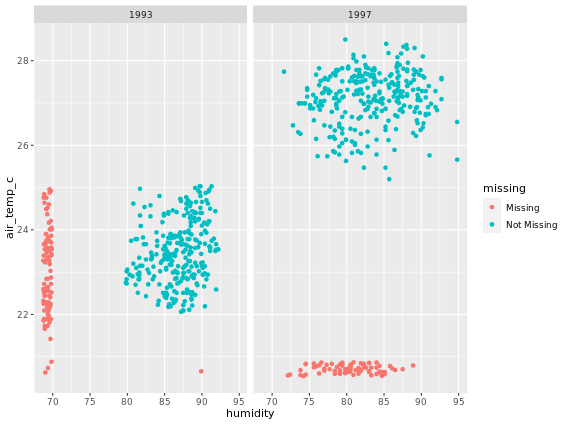

In [ ]:
# Use geom_miss_point() and facet_wrap to explore how the missingness 
# in wind_ew and air_temp_c is different for missingness of humidity
bind_shadow(oceanbuoys) %>%
  ggplot(aes(x = wind_ew,
           y = air_temp_c)) + 
  geom_miss_point() + 
  facet_wrap(~humidity_NA)

# Use geom_miss_point() and facet_grid to explore how the missingness in wind_ew and air_temp_c 
# is different for missingness of humidity AND by year - by using `facet_grid(humidity_NA ~ year)`
bind_shadow(oceanbuoys) %>%
  ggplot(aes(x = wind_ew,
             y = air_temp_c)) + 
  geom_miss_point() + 
  facet_grid(humidity_NA~year)

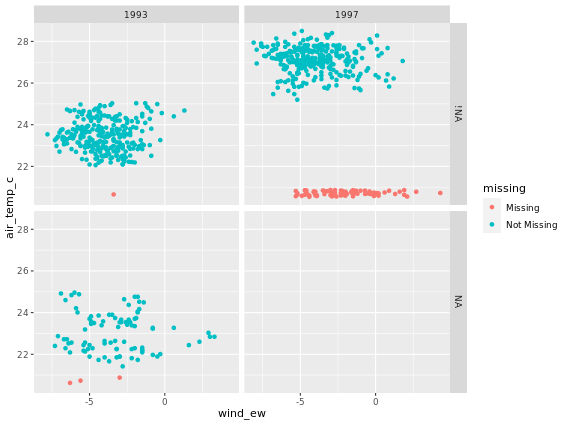

In [ ]:
# Impute the data below the range using `impute_below`.
ocean_imp <- impute_below_all(oceanbuoys)

# Visualize the new missing values
ggplot(ocean_imp,
       aes(x = wind_ew, y = air_temp_c)) + 
  geom_point()

# Impute and track data with `bind_shadow`, `impute_below`, and `add_label_shadow`
ocean_imp_track <- bind_shadow(oceanbuoys) %>% 
  impute_below_all() %>%
  add_label_shadow()

# Look at the imputed values
ocean_imp_track

In [ ]:
# Impute and track the missing values
ocean_imp_track <- bind_shadow(oceanbuoys) %>% 
  impute_below_all() %>%
  add_label_shadow()

# Visualize the missingness in wind and air temperature,  
# coloring missing air temp values with air_temp_c_NA
ggplot(ocean_imp_track,
       aes(x = wind_ew, y = air_temp_c, color = air_temp_c_NA)) + 
  geom_point()

# Visualize humidity and air temp, coloring any missing cases using the variable any_missing
ggplot(ocean_imp_track,
       aes(x = humidity, y = air_temp_c, color = any_missing)) + 
  geom_point()

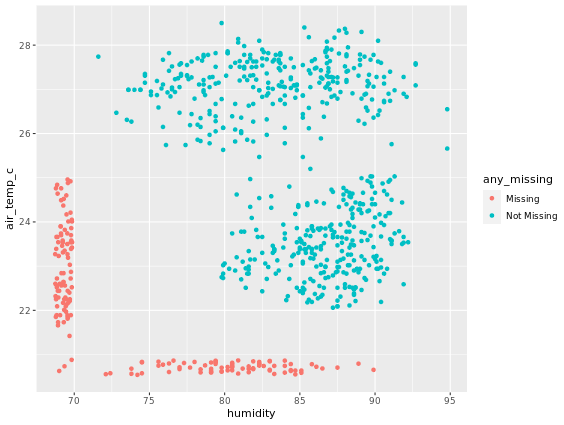

In [ ]:
# Explore the values of air_temp_c, visualizing the amount of missings with `air_temp_c_NA`.
p <- ggplot(ocean_imp_track, aes(x = air_temp_c, fill = air_temp_c_NA)) + geom_histogram()

# Expore the missings in humidity using humidity_NA
p2 <- ggplot(ocean_imp_track, aes(x = humidity, fill = humidity_NA)) + geom_histogram()

# Explore the missings in air_temp_c according to year, using `facet_wrap(~year)`.
p + facet_wrap(~year)

# Explore the missings in humidity according to year, using `facet_wrap(~year)`.
p2 + facet_wrap(~year)

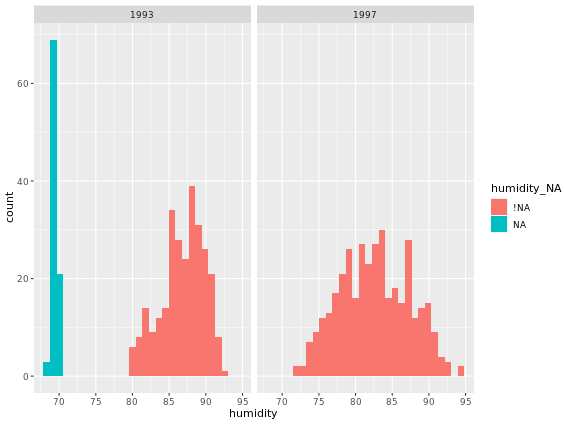

In [ ]:
# Impute the mean value and track the imputations 
ocean_imp_mean <- bind_shadow(oceanbuoys) %>% 
  impute_mean_all() %>% 
  add_label_shadow()

# Explore the mean values in humidity in the imputed dataset
ggplot(ocean_imp_mean, 
       aes(x = humidity_NA, y = humidity)) + 
  geom_boxplot()

# Explore the values in air temperature in the imputed dataset
ggplot(ocean_imp_mean, 
       aes(x = air_temp_c_NA, y = air_temp_c)) + 
  geom_boxplot()

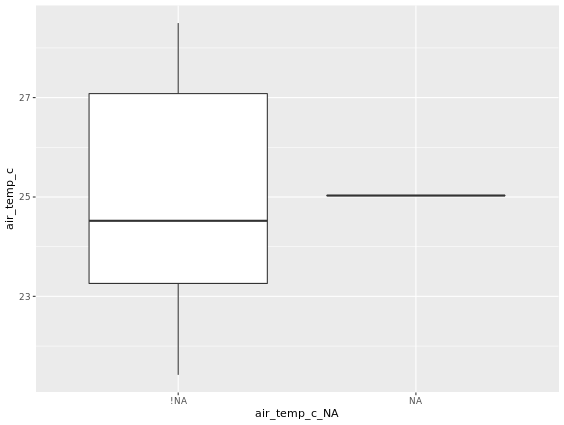

In [ ]:
# Explore imputations in air temperature and humidity,  
# coloring by the variable, any_missing
ggplot(ocean_imp_mean, 
       aes(x = air_temp_c, y = humidity, color = any_missing)) + 
  geom_point()

# Explore imputations in air temperature and humidity,  
# coloring by the variable, any_missing, and faceting by year
ggplot(ocean_imp_mean, 
       aes(x = air_temp_c, y = humidity, color = any_missing)) +
  geom_point() + 
  facet_wrap(~year)

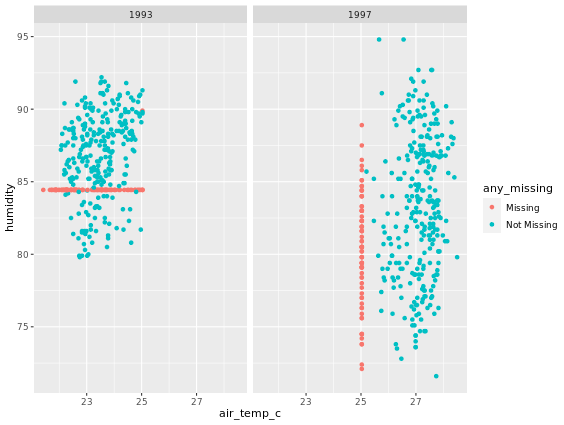

In [ ]:
# Gather the imputed data 
ocean_imp_mean_gather <- shadow_long(ocean_imp_mean,
                                     humidity,
                                     air_temp_c)
# Inspect the data
ocean_imp_mean_gather

# Explore the imputations in a histogram 
ggplot(ocean_imp_mean_gather, 
       aes(x = value, fill = value_NA)) + 
  geom_histogram() + 
  facet_wrap(~variable)

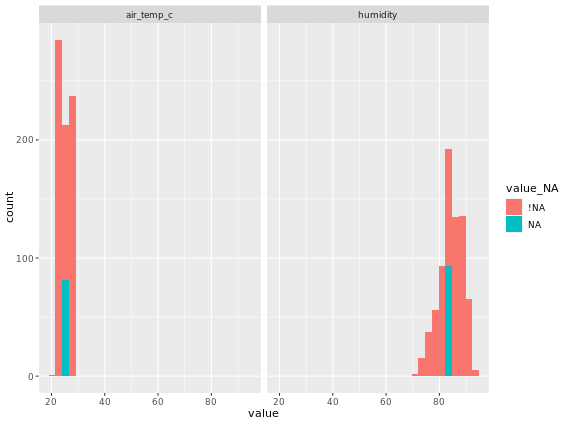

In [ ]:
# Impute humidity and air temperature using wind_ew and wind_ns, and track missing values
ocean_imp_lm_wind <- oceanbuoys %>% 
    bind_shadow() %>%
    impute_lm(air_temp_c ~ wind_ew + wind_ns) %>% 
    impute_lm(humidity ~ wind_ew + wind_ns) %>%
    add_label_shadow()
    
# Plot the imputed values for air_temp_c and humidity, colored by missingness
ggplot(ocean_imp_lm_wind, 
       aes(x = air_temp_c, y = humidity, color = any_missing)) +
  geom_point()

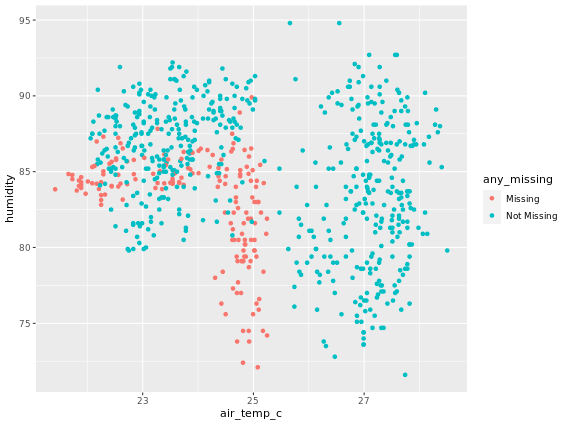

In [ ]:
# Bind the models together 
bound_models <- bind_rows(mean = ocean_imp_mean,
                          lm_wind = ocean_imp_lm_wind,
                          .id = "imp_model")

# Inspect the values of air_temp and humidity as a scatter plot
ggplot(bound_models,
       aes(x = air_temp_c,
           y = humidity,
           color = any_missing)) +
  geom_point() + 
  facet_wrap(~imp_model)

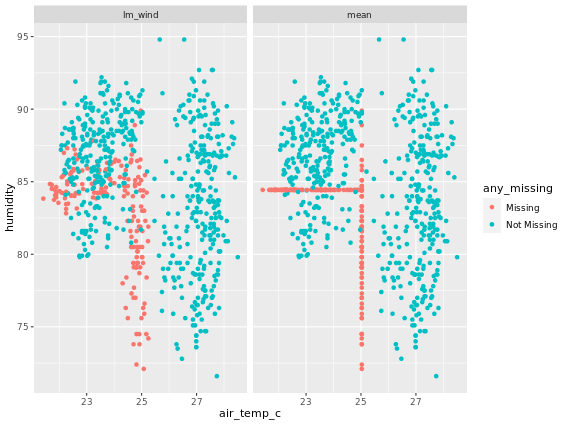

In [ ]:
# Build a model adding year to the outcome
ocean_imp_lm_wind_year <- bind_shadow(oceanbuoys) %>%
  impute_lm(air_temp_c ~ wind_ew + wind_ns + year) %>%
  impute_lm(humidity ~ wind_ew + wind_ns + year) %>%
  add_label_shadow()

# Bind the mean, lm_wind, and lm_wind_year models together
bound_models <- bind_rows(mean = ocean_imp_mean,
                          lm_wind = ocean_imp_lm_wind,
                          lm_wind_year = ocean_imp_lm_wind_year,
                          .id = "imp_model")

# Explore air_temp and humidity, coloring by any missings, and faceting by imputation model
ggplot(bound_models, aes(x = air_temp_c, y = humidity, color = any_missing)) +
  geom_point() + facet_wrap(~imp_model)

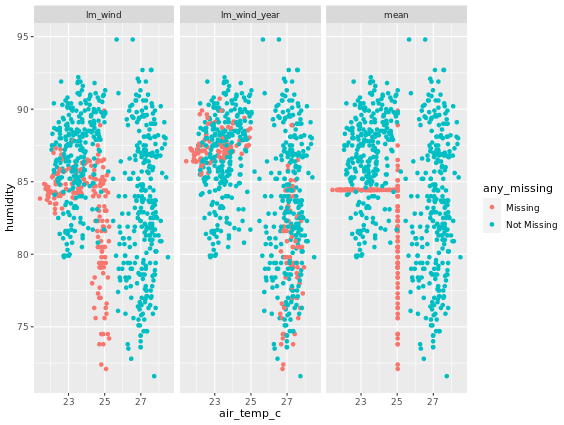

In [ ]:
# Create an imputed dataset using a linear models
ocean_imp_lm_all <- bind_shadow(oceanbuoys) %>%
  add_label_shadow() %>%
  impute_lm(sea_temp_c ~ wind_ew + wind_ns + year + latitude + longitude) %>%
  impute_lm(air_temp_c ~ wind_ew + wind_ns + year + latitude + longitude) %>%
  impute_lm(humidity ~ wind_ew + wind_ns + year + latitude + longitude)

# Bind the datasets
bound_models <- bind_rows(cc = ocean_cc,
                          imp_lm_wind = ocean_imp_lm_wind,
                          imp_lm_all = ocean_imp_lm_all,
                          .id = "imp_model")

# Look at the models
bound_models

In [ ]:
# Create the model summary for each dataset
model_summary <- bound_models %>% 
  group_by(imp_model) %>%
  nest() %>%
  mutate(mod = map(data, ~lm(sea_temp_c ~ air_temp_c + humidity + year, data = .)),
         res = map(mod, residuals),
         pred = map(mod, predict),
         tidy = map(mod, tidy))

# Explore the coefficients in the model
model_summary %>% 
    select(imp_model,tidy) %>%
	unnest()
best_model <- "imp_lm_all"